<h2 style="color:green;text-align:center">Digit Handwriting Recognition </h3>

<h3 style="color:green;text-align:center"> Allie Zombron, Seth Hollatz, and Georgia Barefoot </h3>

<h3><b>Import Packages </h3></b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns

<h3><b>Load the MNIST Dataset </h3></b>

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto', cache=True)
y = y.astype(int)

<h3><b>Preprocessing</h3></b>

In [3]:
# normalizing the values into [0,1]
X = X / 255.0

In [4]:
X.data.shape

(70000, 784)

<h3><b>Split into Training and Testing Sets</h3></b>

In [5]:
# split train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

<h3><b>Visualizing the First 10 Samples</h3></b>

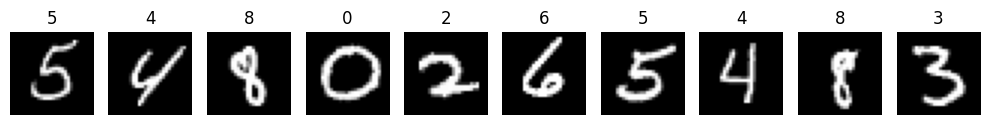

In [6]:
# visualize first 10 sample digits
plt.figure(figsize=(10,2))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(y_train[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

<h3><b>Build a Pipeline</h3></b>

**MLPClassifier:**
- hidden layers: 256, 128, 32
- 'adam' optimizer
- learning rate: 0.001
- max_iter = 300
- random_state = 1
- verbose=True


In [7]:
# building a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes = (256, 128, 32),
        solver = 'adam',
        learning_rate_init = 0.001,
        max_iter = 300,
        random_state=1,
        #tol = 1e-2,
        #alpha = 1e-4
        early_stopping=True,
        n_iter_no_change=10,
        verbose=True,
    )),
])

In [8]:
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.31481460
Validation score: 0.951250
Iteration 2, loss = 0.10157982
Validation score: 0.963214
Iteration 3, loss = 0.05986806
Validation score: 0.966429
Iteration 4, loss = 0.04260776
Validation score: 0.963750
Iteration 5, loss = 0.02984441
Validation score: 0.970714
Iteration 6, loss = 0.02197348
Validation score: 0.969821
Iteration 7, loss = 0.01913675
Validation score: 0.966429
Iteration 8, loss = 0.02171154
Validation score: 0.971071
Iteration 9, loss = 0.01993788
Validation score: 0.969464
Iteration 10, loss = 0.01892461
Validation score: 0.969643
Iteration 11, loss = 0.01569855
Validation score: 0.972857
Iteration 12, loss = 0.00933736
Validation score: 0.971250
Iteration 13, loss = 0.01393091
Validation score: 0.974464
Iteration 14, loss = 0.01489939
Validation score: 0.970714
Iteration 15, loss = 0.01143935
Validation score: 0.972321
Iteration 16, loss = 0.01313732
Validation score: 0.966964
Iteration 17, loss = 0.02017979
Validation score: 0.966429
Iterat

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(256, 128, 32), max_iter=300,
                               random_state=1, verbose=True))])

<h3><b>Plot training loss curve</h3></b>

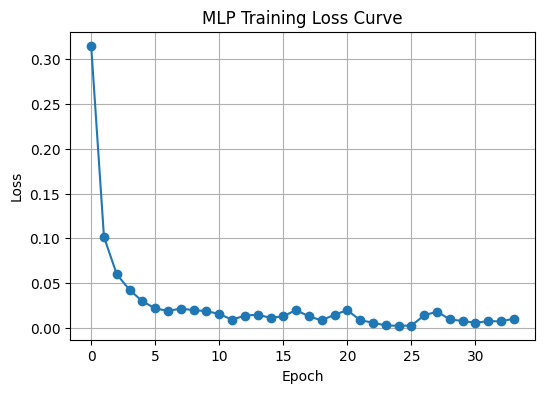

In [10]:
mlp = pipeline.named_steps['mlp']
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, marker='o')
plt.title('MLP Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

<h3><b>Cross Validation</h3></b>

In [11]:
# checking the 5 fold stability on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, n_jobs=-1)
print('5-fold Cross Validation Scores:', cv_scores)
print('Cross Validation mean accuracy:', cv_scores.mean())

5-fold Cross Validation Scores: [0.97571429 0.97401786 0.97535714 0.97267857 0.97491071]
Cross Validation mean accuracy: 0.9745357142857143


<h3><b>Evaluate on Test Set</h3></b>

In [12]:
# test set accuracy
y_pred = pipeline.predict(X_test)
print("Test set accuracy", accuracy_score(y_test, y_pred))

Test set accuracy 0.9733571428571428


In [13]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.97      0.99      0.98      1396
           7       0.97      0.98      0.97      1503
           8       0.96      0.97      0.96      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



<h3><b>Confusion Matrix</h3></b>

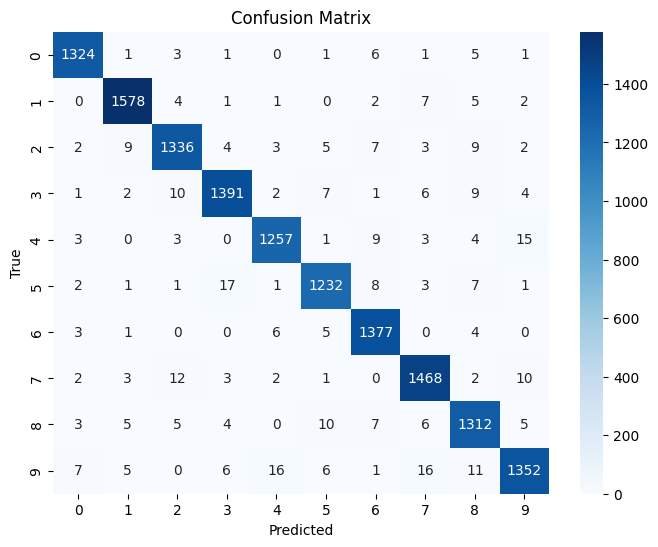

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, fmt='d', annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

<h3><b>Visualize Misclassified Digits</h3></b>

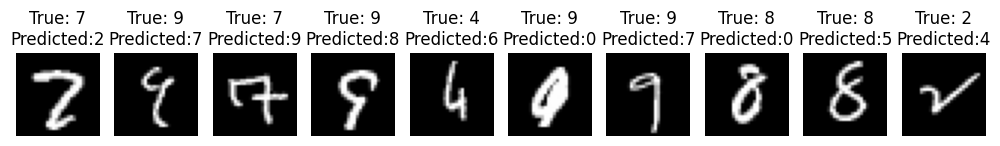

In [15]:
misclassified_idx = np.where(y_test != y_pred)[0]
plt.figure(figsize=(10,2))
for i, idx in enumerate(misclassified_idx[:10]):
    ax = plt.subplot(1,10,i+1)
    ax.imshow(X_test[idx].reshape(28,28), cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPredicted:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<h3><b>Learning Curve</h3></b>

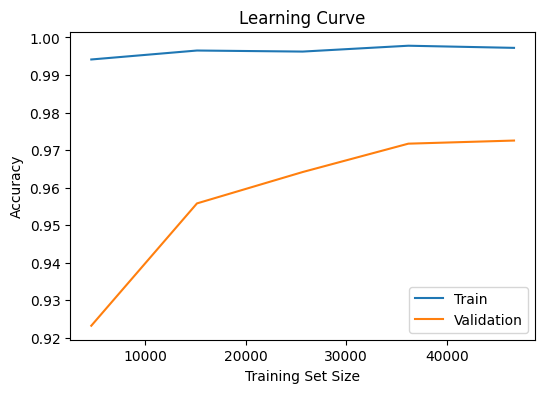

Iteration 1, loss = 0.48342120
Validation score: 0.933775
Iteration 2, loss = 0.14023596
Validation score: 0.948578
Iteration 3, loss = 0.08098265
Validation score: 0.950915
Iteration 4, loss = 0.04976304
Validation score: 0.954032
Iteration 5, loss = 0.03206217
Validation score: 0.953642
Iteration 6, loss = 0.02177324
Validation score: 0.953253
Iteration 7, loss = 0.01317269
Validation score: 0.955980
Iteration 8, loss = 0.00767572
Validation score: 0.957148
Iteration 9, loss = 0.00517167
Validation score: 0.959486
Iteration 10, loss = 0.00264659
Validation score: 0.958317
Iteration 11, loss = 0.00169009
Validation score: 0.957148
Iteration 12, loss = 0.00122438
Validation score: 0.959486
Iteration 13, loss = 0.00092254
Validation score: 0.957148
Iteration 14, loss = 0.00073853
Validation score: 0.955980
Iteration 15, loss = 0.00065204
Validation score: 0.957538
Iteration 16, loss = 0.00058204
Validation score: 0.957538
Iteration 17, loss = 0.00053019
Validation score: 0.956759
Iterat

In [16]:
# learning curve 
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, X, y, cv=3,
    train_sizes=np.linspace(0.1,1.0,5), n_jobs=-1
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()

- **Data Loading** from OpenML
- **Normalization** to [0,1]
- **Train/Test Split** 80/20
- **Visualization** of digits
- **Feature Scaling** with `StandardScaler`
- **Pipeline** construction
    - **StandardScaler**
    - **MLPClassifier**
- **Training Loss Curve** for convergence
- **Cross-Validation** for model stability
- **Test Set Evaluation:** accuracy, classification report
- **Confusion Matrix** visualization
- **Misclassification** of the digits
- **Learning Curve** for variance and bias